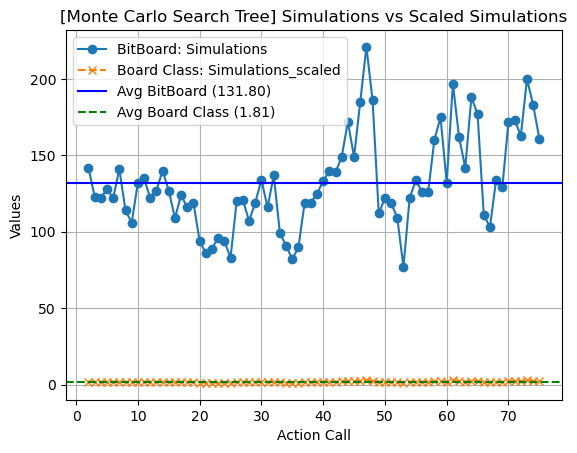

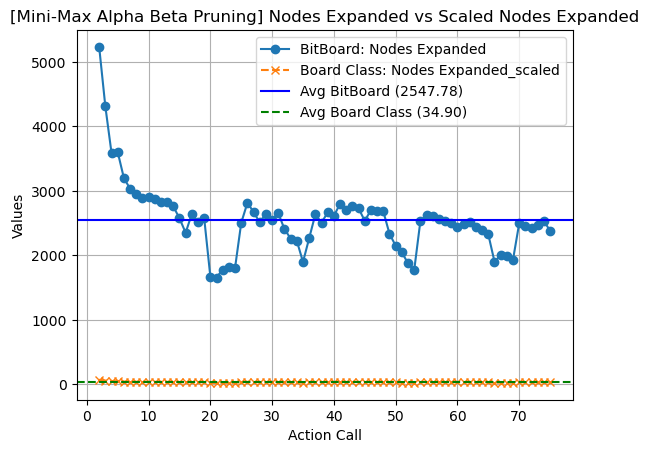

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def load_data(file_path):
    """Load CSV file into DataFrame."""
    return pd.read_csv(file_path)

def scale_values(df, columns, scale_factor):
    """Scale values in specified columns by a given scale factor."""
    for col in columns:
        new_col_name = f"{col}_scaled"
        df[new_col_name] = df[col] * (1 + scale_factor)
    return df

def plot_data(df, action_col, original_col, scaled_col, title):
    """Plot original and scaled data on a graph, and display average values."""
    fig, ax = plt.subplots()
    if action_col in df.columns and original_col in df.columns and scaled_col in df.columns:
        ax.plot(df[action_col], df[original_col], label=f'BitBoard: {original_col}', marker='o')
        ax.plot(df[action_col], df[scaled_col], label=f'Board Class: {scaled_col}', linestyle='--', marker='x')
        
        # Compute and display average values
        original_avg = df[original_col].mean()
        scaled_avg = df[scaled_col].mean()
        ax.axhline(y=original_avg, color='blue', linestyle='-', label=f'Avg BitBoard ({original_avg:.2f})')
        ax.axhline(y=scaled_avg, color='green', linestyle='--', label=f'Avg Board Class ({scaled_avg:.2f})')

        ax.set_title(title)
        ax.set_xlabel('Action Call')
        ax.set_ylabel('Values')
        ax.grid(True)
        ax.legend()
    plt.show()

# Load the data files
df1 = load_data('csv_data/mini_max_simulations.csv')
df2 = load_data('csv_data/monte_carlo_simulations.csv')

# Percentage difference between bitboards vs board_class
scale_factor = -98.63 / 100

df1 = scale_values(df1, ['Simulations'], scale_factor)
df2 = scale_values(df2, ['Nodes Expanded'], scale_factor)

plot_data(df1, 'Action Call', 'Simulations', 'Simulations_scaled', '[Monte Carlo Search Tree] Simulations vs Scaled Simulations')
plot_data(df2, 'Action Call', 'Nodes Expanded', 'Nodes Expanded_scaled', '[Mini-Max Alpha Beta Pruning] Nodes Expanded vs Scaled Nodes Expanded')

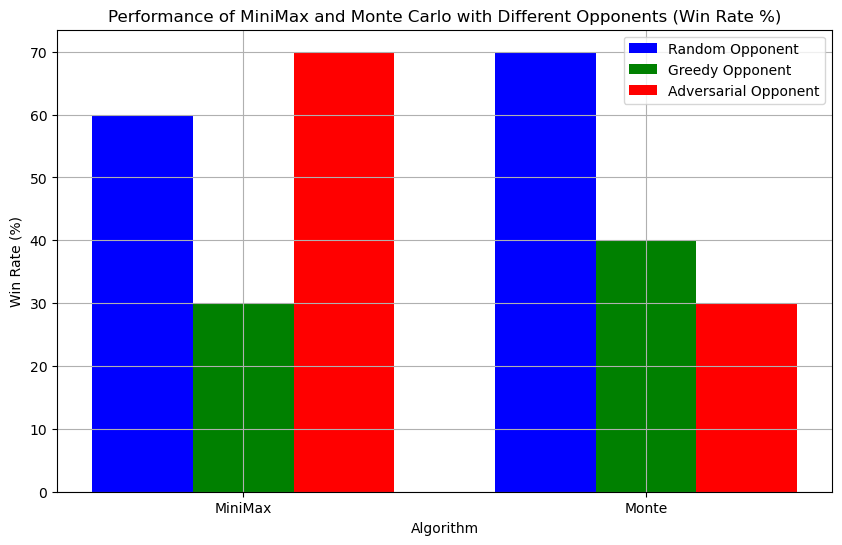

In [3]:
import numpy as np

# Data
labels = ['MiniMax', 'Monte']
random_opponent = [6, 7]
greedy_opponent = [3, 4]
adversarial_opponent = [7, 3]


x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

# Adjusting the data to represent percentage win rate out of 10 simulations
random_opponent = [i / 10 * 100 for i in random_opponent]
greedy_opponent = [i / 10 * 100 for i in greedy_opponent]
adversarial_opponent = [i / 10 * 100 for i in adversarial_opponent]

# Recreating the plot with adjusted data
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, random_opponent, width, label='Random Opponent', color='blue')
rects2 = ax.bar(x, greedy_opponent, width, label='Greedy Opponent', color='green')
rects3 = ax.bar(x + width, adversarial_opponent, width, label='Adversarial Opponent', color='red')

# Adding labels, title and custom x-axis tick labels
ax.set_xlabel('Algorithm')
ax.set_ylabel('Win Rate (%)')
ax.set_title('Performance of MiniMax and Monte Carlo with Different Opponents (Win Rate %)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Adding grid
ax.grid(True)

# Show plot
plt.show()
